In [1]:
import sys, os
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'./src'))
print(sys.path)

import unittest
from icdlmmeval.codiesp.codiformat import CodiFormat
from icdlmmeval import ner_parsing


codiformat = CodiFormat()
df_train_x = codiformat.get_df_x("train")
df_dev_x = codiformat.get_df_x("dev")
df_test_x = codiformat.get_df_x("test")

df_train_x.head(25)

print(df_train_x.head(25))



['/home/jovyan/work/icdllmeval/notebooks', '/opt/conda/lib/python310.zip', '/opt/conda/lib/python3.10', '/opt/conda/lib/python3.10/lib-dynload', '', '/opt/conda/lib/python3.10/site-packages', '/home/jovyan/work/icdllmeval/./src']


2023-07-28 12:40:27.012610: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-07-28 12:40:27.012688: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-28 12:40:27.012714: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (f1401f85aa9b): /proc/driver/nvidia/version does not exist


                         FILE           TYPE     CODE  \
0   S0004-06142005000700014-1  PROCEDIMIENTO  bw03zzz   
1   S0004-06142005000700014-1  PROCEDIMIENTO  3e02329   
2   S0004-06142005000700014-1    DIAGNOSTICO    n44.8   
3   S0004-06142005000700014-1    DIAGNOSTICO  z20.818   
4   S0004-06142005000700014-1    DIAGNOSTICO    r60.9   
5   S0004-06142005000700014-1    DIAGNOSTICO      r52   
6   S0004-06142005000700014-1    DIAGNOSTICO    a23.9   
7   S0004-06142005000700014-1    DIAGNOSTICO    a23.9   
8   S0004-06142005000700014-1    DIAGNOSTICO    a23.9   
9   S0004-06142005000700014-1    DIAGNOSTICO   i83.90   
10  S0004-06142005000700014-1  PROCEDIMIENTO  bw40zzz   
11  S0004-06142005000700014-1    DIAGNOSTICO    i87.8   
12  S0004-06142005000700014-1  PROCEDIMIENTO  bv44zzz   
13  S0004-06142005000700014-1    DIAGNOSTICO    r50.9   
14  S0004-06142005000700014-1    DIAGNOSTICO    r50.9   
15  S0004-06142005000700014-1    DIAGNOSTICO    n45.3   
16  S0004-06142005000700014-1  

In [2]:
df_train_x_cm = df_train_x[df_train_x["TYPE"] == codiformat.DIAGNOSTICO]
df_dev_x_cm = df_dev_x[df_dev_x["TYPE"] == codiformat.DIAGNOSTICO]
df_test_x_cm = df_test_x[df_test_x["TYPE"] == codiformat.DIAGNOSTICO]

df_train_x_pcs = df_test_x[df_train_x["TYPE"] == codiformat.PROCEDIMIENTO]
df_dev_x_pcs = df_dev_x[df_dev_x["TYPE"] == codiformat.PROCEDIMIENTO]
df_test_x_pcs = df_test_x[df_test_x["TYPE"] == codiformat.PROCEDIMIENTO]

/tmp/ipykernel_1195/2451871243.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train_x_pcs = df_test_x[df_train_x["TYPE"] == codiformat.PROCEDIMIENTO]


In [35]:
cm_not_present = set(df_test_x_cm["CODE"].unique()).difference(set(df_train_x_cm["CODE"].unique()))
cm_set = df_test_x_cm["CODE"].unique()

print("unique cm train = {unique}".format(unique=df_train_x_cm["CODE"].unique()))
print("unique cm test = {unique}".format(unique=len(cm_set)))
print("test not covered by train = {unique}".format(unique=len(cm_not_present)))

validate = not cm_not_present.pop() in df_train_x_cm["CODE"].to_list()
print(validate)
cm_not_present_list = [x for x in df_test_x_cm["CODE"].to_list() if x in cm_not_present]
cm_list = df_test_x_cm["CODE"].to_list()
cm_not_present_list_len = len(cm_not_present_list)

print("abs cm train not present = {cm_not_present_list}".format(cm_not_present_list = len(cm_not_present_list)))
print("abs cm train = {cm_list}".format(cm_list =len(cm_list)))

unique_perc = len(cm_not_present)/ len(cm_set)
print(unique_perc)
print(len(cm_not_present_list)/ len(cm_list))

cm_not_present_len = len(cm_not_present)
cm_present_len = len(cm_set) - len(cm_not_present)
cm_list_len = len(cm_list)


unique cm train = ['n44.8' 'z20.818' 'r60.9' ... 'l93.0' 'c56.2' 'r97.1']
unique cm test = 1143
test not covered by train = 439
True
abs cm train not present = 590
abs cm train = 3665
0.38320209973753283
0.16098226466575716


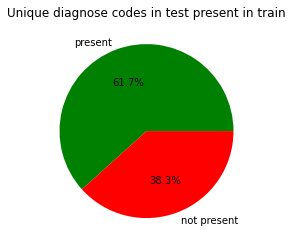

In [63]:
import matplotlib.pyplot as plt

sizes = [cm_present_len, cm_not_present_len]
labels = 'present', 'not present'
colors= ['green', 'red']

fig, ax = plt.subplots()
plt.title(label="Unique diagnose codes in test present in train", fontdict=None, loc='center', pad=None)
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.savefig('codiesp-cm-codes-present.png', transparent=False, bbox_inches='tight', dpi=300, )


Is pcs code 0wuf from test present in train? -> False
231 unique pcs codes not present in test which is 0.6226415094339622
363 of 1112 test pcs are not present in train pcs which is 0.32643884892086333


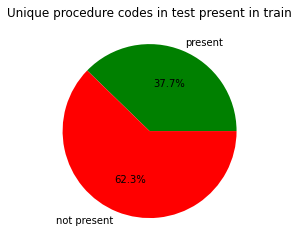

In [64]:
pcs_not_present = set(df_test_x_pcs["CODE"].unique()).difference(set(df_train_x_pcs["CODE"].unique()))
pcs_not_present_len = len(pcs_not_present)
pcs_len = len(df_test_x_pcs["CODE"].unique())
pcs_list_len = len(df_test_x_pcs["CODE"].to_list())
pcs_present_len = pcs_len - pcs_not_present_len


pcs_not_present_1 = list(pcs_not_present)[0]
pcs_present_train = pcs_not_present_1 in df_train_x_pcs["CODE"].to_list()

pcs_not_present_list = [x for x in df_test_x_pcs["CODE"].to_list() if x in pcs_not_present]
pcs_not_present_list_len = len(pcs_not_present_list)
pcs_not_present_perc = pcs_not_present_list_len / pcs_list_len

print("Is pcs code {code} from test present in train? -> {present}".format(code=pcs_not_present_1, present=pcs_present_train))

pcs_not_present_len_perc = pcs_not_present_len / pcs_len
print(f"{pcs_not_present_len} unique pcs codes not present in test which is {pcs_not_present_len_perc}")
print(f"{pcs_not_present_list_len} of {pcs_list_len} test pcs are not present in train pcs which is {pcs_not_present_perc}")

import matplotlib.pyplot as plt

sizes = [pcs_present_len, pcs_not_present_len]
labels = 'present', 'not present'
colors= ['green', 'red']

fig, ax = plt.subplots()
plt.title(label="Unique procedure codes in test present in train", fontdict=None, loc='center', pad=None)
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.savefig('codiesp-pcs-codes-present.png', transparent=False, bbox_inches='tight', dpi=300, )

In [6]:
from icdlmmeval.icd_lookup import IcdLookup
icd_lookup = IcdLookup()

read path_icd_10_cm_codes
72184
read path_icd_10_pcs_codes
77559
read codiesp_codes
read icd10cm_index
read icd10cm_neoplasm
read icd10pcs_index
lookup dictonaries loaded


In [231]:
from collections import Counter

def get_pcs_description(code): 
    return icd_lookup.get_procedure_description_es(code)

pcs_descriptions = [get_pcs_description(not_present) for not_present in pcs_not_present]
pcs_descriptions_list = [get_pcs_description(not_present) for not_present in pcs_not_present_list]

c = Counter(pcs_descriptions)
print(c)
c = Counter(pcs_descriptions_list)
print(c)

print(143 / pcs_len)
print(223 / pcs_list_len)


Counter({nan: 143, 'Fragmentación en pelvis renal, izquierda, abordaje externo': 1, 'Reparación de piel, cuello, abordaje externo': 1, 'Imagen tomográfica por emisión de positrones de cuerpo entero, con otro radioisótopo': 1, 'Soporte de ventilación, respiratorio(-a), menos de 24 horas consecutivas': 1, 'Escisión de íleon, diagnóstico(-a), abordaje orificio natural o artificial, endoscópico': 1, 'Soporte de ventilación, respiratorio(-a), 24-96 horas consecutivas': 1, 'Resección de intestino grueso, derecho, abordaje endoscópico percutáneo': 1, 'Ecografía de glándula suprarrenal, derecha': 1, 'Reposición de articulación muñeca, izquierda, abordaje externo': 1, 'Resección de mama, izquierda, abordaje abierto': 1, 'Imagen planar de medicina nuclear de pulmones y bronquios, con otro radioisótopo': 1, 'Ecografía de corazón, lados derecho e izquierdo, transesofágico': 1, 'Aféresis, circulatorio(-a), en plasma, único(-a)': 1, 'Radiografía simple de cadera, derecha': 1, 'Escisión de hígado, di

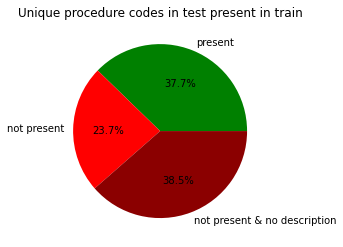

In [68]:
sizes = [pcs_present_len, pcs_not_present_len - 143, 143]
labels = 'present', 'not present',  'not present & no description'
colors= ['green', 'red', 'darkred']

fig, ax = plt.subplots()
plt.title(label="Unique procedure codes in test present in train", fontdict=None, loc='center', pad=None)
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.savefig('codiesp-pcs-codes-present.png', transparent=False, bbox_inches='tight', dpi=300, )

3665
590
1112
363
223
4777
not present abs 953
not present abs perc 0.1994975926313586
not present abs perc 0.04668201800293071


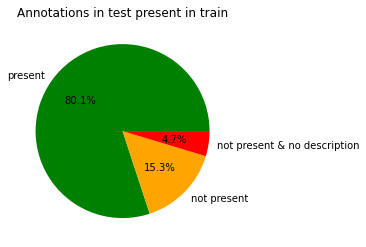

In [69]:
print(cm_list_len)
print(cm_not_present_list_len)

print(pcs_list_len)
print(pcs_not_present_list_len)
pcs_not_present_not_desc_list_len = 223
print(pcs_not_present_not_desc_list_len)

print(cm_list_len + pcs_list_len)
print('not present abs', cm_not_present_list_len + pcs_not_present_list_len)
print('not present abs perc', (cm_not_present_list_len + pcs_not_present_list_len) / (cm_list_len + pcs_list_len))
print('not present abs perc', pcs_not_present_not_desc_list_len / (cm_list_len + pcs_list_len))


sizes = [cm_list_len - cm_not_present_list_len + pcs_list_len - pcs_not_present_list_len, cm_not_present_list_len + pcs_not_present_list_len - pcs_not_present_not_desc_list_len, pcs_not_present_not_desc_list_len]
labels = 'present', 'not present', 'not present & no description'
colors= ['green',  'orange', 'red']

fig, ax = plt.subplots()
plt.title(label="Annotations in test present in train", fontdict=None, loc='center', pad=None)
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.savefig('codiesp-ann-cm-pcs-codes-present.png', transparent=False, bbox_inches='tight', dpi=300, )

In [1]:
pip freeze

absl-py==1.2.0
aiohttp==3.8.4
aiosignal==1.3.1
alembic @ file:///home/conda/feedstock_root/build_artifacts/alembic_1657813896088/work
altair @ file:///home/conda/feedstock_root/build_artifacts/altair_1640799865332/work
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1652463865103/work/dist
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1640817743617/work
argon2-cffi-bindings @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi-bindings_1649500328244/work
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1618968359944/work
astunparse==1.6.3
async-generator==1.10
async-timeout==4.0.2
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1640799537051/work
Babel @ file:///home/conda/feedstock_root/build_artifacts/babel_1655419414885/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backoff==2.2.1
backports.functools-lru-cache @ file:///home/conda/feedstock_ro

In [46]:
def get_icd_chapter(code):
    if "." in code:
        return code.split(".")[0]
    else:
        return code 
    
def get_chapter():
    ["A","B"], 
    
train_codes = df_train_x_cm["CODE"].to_list()

['n44',
 'z20',
 'r60',
 'r52',
 'a23',
 'a23',
 'a23',
 'i83',
 'i87',
 'r50',
 'r50',
 'n45',
 'n45',
 'm25',
 'a23',
 'd30',
 'r58',
 'r19',
 'n50',
 'n50',
 'd49',
 'r63',
 'r52',
 'd49',
 'r52',
 'n50',
 'c63',
 'd49',
 'g82',
 'g71',
 'r53',
 'z98',
 'g04',
 'r20',
 'k74',
 'n32',
 'g82',
 'g82',
 'i85',
 'g82',
 'i10',
 'r53',
 'b33',
 'z96',
 'r74',
 'c22',
 'k76',
 'i85',
 'r18',
 'k70',
 'n32',
 'k40',
 'n32',
 'n32',
 'n28',
 'c78',
 'c77',
 'q61',
 'r59',
 'n28',
 'n28',
 'k31',
 'k56',
 'n13',
 'd64',
 'r18',
 'n13',
 'n13',
 'r18',
 'c80',
 'k59',
 'd64',
 'c16',
 'd50',
 'r63',
 'c16',
 'i10',
 'c64',
 'n13',
 'k59',
 'n28',
 'k44',
 'n80',
 'r19',
 'r19',
 'k66',
 'r50',
 'n80',
 'n80',
 'r10',
 'r31',
 'r10',
 'n85',
 'r10',
 'n80',
 'r58',
 'r53',
 'n28',
 'n80',
 'n80',
 'n23',
 'r58',
 'n26',
 'r58',
 'z90',
 'r31',
 'n26',
 'c66',
 'n23',
 'n28',
 'i82',
 'c64',
 'n28',
 'n28',
 'd49',
 'n28',
 'n28',
 'd49',
 'd30',
 'n20',
 'n28',
 'c65',
 'r31',
 'r53',
 'n28',


In [140]:
# the following is created by converting a wikipedia html table to json using GPT4
import json

icd_chapters = [
    {
        "Chapter": "I",
        "Block": "A00-B99",
        "Title": "Certain infectious and parasitic diseases"
    },
    {
        "Chapter": "II",
        "Block": "C00-D49",
        "Title": "Neoplasms"
    },
    {
        "Chapter": "III",
        "Block": "D50-D89",
        "Title": "Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism"
    },
    {
        "Chapter": "IV",
        "Block": "E00-E90",
        "Title": "Endocrine, nutritional and metabolic diseases"
    },
    {
        "Chapter": "V",
        "Block": "F00-F99",
        "Title": "Mental and behavioural disorders"
    },
    {
        "Chapter": "VI",
        "Block": "G00-G99",
        "Title": "Diseases of the nervous system"
    },
    {
        "Chapter": "VII",
        "Block": "H00-H59",
        "Title": "Diseases of the eye and adnexa"
    },
    {
        "Chapter": "VIII",
        "Block": "H60-H95",
        "Title": "Diseases of the ear and mastoid process"
    },
    {
        "Chapter": "IX",
        "Block": "I00-I99",
        "Title": "Diseases of the circulatory system"
    },
    {
        "Chapter": "X",
        "Block": "J00-J99",
        "Title": "Diseases of the respiratory system"
    },
    {
        "Chapter": "XI",
        "Block": "K00-K93",
        "Title": "Diseases of the digestive system"
    },
    {
        "Chapter": "XII",
        "Block": "L00-L99",
        "Title": "Diseases of the skin and subcutaneous tissue"
    },
    {
        "Chapter": "XIII",
        "Block": "M00-M99",
        "Title": "Diseases of the musculoskeletal system and connective tissue"
    },
    {
        "Chapter": "XIV",
        "Block": "N00-N99",
        "Title": "Diseases of the genitourinary system"
    },
    {
        "Chapter": "XV",
        "Block": "O00-O99",
        "Title": "Pregnancy, childbirth and the puerperium"
    },
    {
        "Chapter": "XVI",
        "Block": "P00-P96",
        "Title": "Certain conditions originating in the perinatal period"
    },
    {
        "Chapter": "XVII",
        "Block": "Q00-Q99",
        "Title": "Congenital malformations, deformations and chromosomal abnormalities"
    },
    {
        "Chapter": "XVIII",
        "Block": "R00-R99",
        "Title": "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified"
    },
    {
        "Chapter": "XIX",
        "Block": "S00-T98",
        "Title": "Injury, poisoning and certain other consequences of external causes"
    },
    {
        "Chapter": "XX",
        "Block": "V01-Y98",
        "Title": "External causes of morbidity and mortality"
    },
    {
        "Chapter": "XXI",
        "Block": "Z00-Z99",
        "Title": "Factors influencing health status and contact with health services"
    },
    {
        "Chapter": "XXII",
        "Block": "U00-U99",
        "Title": "Codes for special purposes"
    }
]

def is_in_block(icd_code, block):
    block_split = block.split("-")
    start = block_split[0]
    end = block_split[1]
    start_code, end_code = start[0] + start[1:3], end[0] + end[1:3] # Consider the alphabet and first two digits after the alphabet.

    # Note that 'icd_code' should also be truncated to the alphabet and first two digits for this comparison.
    icd_code_truncated = icd_code[0] + icd_code[1:3]

    # Convert the strings to a format that allows for comparison.
    start_code_val, end_code_val, icd_code_val = ord(start_code[0]) * 100 + int(start_code[1:]), ord(end_code[0]) * 100 + int(end_code[1:]), ord(icd_code_truncated[0]) * 100 + int(icd_code_truncated[1:])

    return start_code_val <= icd_code_val <= end_code_val


def find_chapter(icd_code, icd_chapters):
    icd_code = icd_code.upper()
    print(icd_code)
    
    for chapter in icd_chapters:
        block = chapter["Block"]
        if icd_code[0] == "V":
            # hack for "V00.121"
            return icd_chapters[len(icd_chapters) - 3]
        if icd_code[0] == "Z":
            # hack for "Z3A.18"
            return icd_chapters[len(icd_chapters) - 2]
        if is_in_block(icd_code=icd_code, block=block):
            return chapter
    return f"Code={icd_code} not found in any chapter"

def get_chapter_index(code_chapter, icd_chapters):
    return icd_chapters.index(code_chapter)



code_chapter = find_chapter("D89.22", icd_chapters=icd_chapters)
code_chapter_index = get_chapter_index(code_chapter, icd_chapters=icd_chapters)
code_chapter, code_chapter_index

D89.22


({'Chapter': 'III',
  'Block': 'D50-D89',
  'Title': 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism'},
 2)

In [141]:
invalid_codes = []

chapter_index = [get_chapter_index(find_chapter(code, icd_chapters=icd_chapters), icd_chapters=icd_chapters) for code in train_codes]
chapter_index

N44.8
Z20.818
R60.9
R52
A23.9
A23.9
A23.9
I83.90
I87.8
R50.9
R50.9
N45.3
N45.3
M25.50
A23.9
D30.3
R58
R19.00
N50.9
N50.9
D49.59
R63.4
R52
D49.59
R52
N50.89
C63.10
D49.59
G82.21
G71.8
R53.81
Z98.85
G04.1
R20.1
K74.60
N32.9
G82.20
G82.20
I85.00
G82.20
I10
R53.1
B33.3
Z96.0
R74.0
C22.0
K76.6
I85.01
R18.8
K70.30
N32.0
K40.90
N32.89
N32.89
N28.89
C78.7
C77.9
Q61.3
R59.9
N28.89
N28.9
K31.7
K56.60
N13.9
D64.9
R18.8
N13.30
N13.30
R18.0
C80.0
K59.00
D64.9
C16.9
D50.9
R63.0
C16.9
I10
C64.9
N13.8
K59.00
N28.89
K44.9
N80.9
R19.00
R19.00
K66.0
R50.9
N80.9
N80.9
R10.2
R31.9
R10.2
N85.8
R10.2
N80.9
R58
R53.81
N28.89
N80.9
N80.8
N23
R58
N26.1
R58
Z90.710
R31.9
N26.1
C66.9
N23
N28.89
I82.90
C64.9
N28.89
N28.1
D49.511
N28.89
N28.89
D49.511
D30.01
N20.0
N28.9
C65.9
R31.9
R53.81
N28.9
R58
N28.9
N28.9
N44.2
I86.1
I86.1
N41.0
N53.12
R52
R10.30
R52
D40.11
R36.1
D18.00
R10.30
N28.89
N28.9
R69
R23.1
N28.1
N28.89
C79.02
D64.9
R31.9
R31.29
J43.9
N28.89
C34.90
C34.91
C64.9
C79.00
N28.1
J44.9
C34.90
D49.1
R31.9
R5

[13,
 20,
 17,
 17,
 0,
 0,
 0,
 8,
 8,
 17,
 17,
 13,
 13,
 12,
 0,
 1,
 17,
 17,
 13,
 13,
 1,
 17,
 17,
 1,
 17,
 13,
 1,
 1,
 5,
 5,
 17,
 20,
 5,
 17,
 10,
 13,
 5,
 5,
 8,
 5,
 8,
 17,
 0,
 20,
 17,
 1,
 10,
 8,
 17,
 10,
 13,
 10,
 13,
 13,
 13,
 1,
 1,
 16,
 17,
 13,
 13,
 10,
 10,
 13,
 2,
 17,
 13,
 13,
 17,
 1,
 10,
 2,
 1,
 2,
 17,
 1,
 8,
 1,
 13,
 10,
 13,
 10,
 13,
 17,
 17,
 10,
 17,
 13,
 13,
 17,
 17,
 17,
 13,
 17,
 13,
 17,
 17,
 13,
 13,
 13,
 13,
 17,
 13,
 17,
 20,
 17,
 13,
 1,
 13,
 13,
 8,
 1,
 13,
 13,
 1,
 13,
 13,
 1,
 1,
 13,
 13,
 1,
 17,
 17,
 13,
 17,
 13,
 13,
 13,
 8,
 8,
 13,
 13,
 17,
 17,
 17,
 1,
 17,
 1,
 17,
 13,
 13,
 17,
 17,
 13,
 13,
 1,
 2,
 17,
 17,
 9,
 13,
 1,
 1,
 1,
 1,
 13,
 9,
 1,
 1,
 17,
 17,
 13,
 1,
 17,
 1,
 17,
 13,
 13,
 1,
 1,
 1,
 8,
 1,
 17,
 13,
 9,
 0,
 13,
 8,
 13,
 1,
 10,
 10,
 11,
 1,
 4,
 17,
 10,
 17,
 17,
 17,
 17,
 3,
 4,
 17,
 13,
 17,
 17,
 1,
 1,
 17,
 11,
 17,
 1,
 1,
 13,
 13,
 13,
 1,
 1,
 13,
 20,
 17,
 20,

In [146]:
from collections import Counter

c = Counter(chapter_index)
c_sorted = list(sorted((key, value) for key, value in c.items()))

def get_axis_title(item):

    return "({chapter}) {block}".format(chapter=item["Chapter"],block=item["Block"], title=item["Title"])

print(c_sorted)
chapter_titles = [get_axis_title(item) for item in icd_chapters]
print(chapter_titles)

print(len(c_sorted))
print(len(chapter_titles))
values = [item[1] for item in c_sorted]
values.append(0)



[(0, 506), (1, 525), (2, 209), (3, 285), (4, 186), (5, 160), (6, 343), (7, 21), (8, 505), (9, 187), (10, 547), (11, 221), (12, 298), (13, 481), (14, 23), (15, 3), (16, 105), (17, 2139), (18, 232), (19, 46), (20, 187)]
['(I) A00-B99', '(II) C00-D49', '(III) D50-D89', '(IV) E00-E90', '(V) F00-F99', '(VI) G00-G99', '(VII) H00-H59', '(VIII) H60-H95', '(IX) I00-I99', '(X) J00-J99', '(XI) K00-K93', '(XII) L00-L99', '(XIII) M00-M99', '(XIV) N00-N99', '(XV) O00-O99', '(XVI) P00-P96', '(XVII) Q00-Q99', '(XVIII) R00-R99', '(XIX) S00-T98', '(XX) V01-Y98', '(XXI) Z00-Z99', '(XXII) U00-U99']
21
22


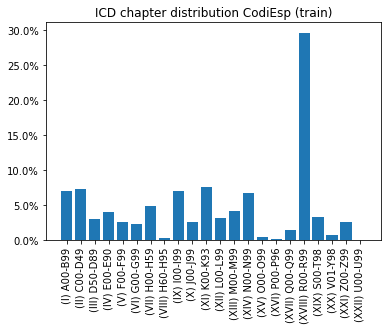

In [169]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

codes_len = len(train_codes)
heights = [value / codes_len for value in values]

bars = chapter_titles
y_pos = range(len(bars))
plt.bar(y_pos, heights)
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title(label="ICD chapter distribution CodiEsp (train)", fontdict=None, loc='center', pad=None)
plt.savefig('codiesp-chapter-distribution.png', transparent=False, bbox_inches='tight', dpi=300, )


In [156]:
print(2139 / len(train_codes))


0.29671244277985853
